In [ ]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#pd.set_option('max_rows', None)

In [ ]:
%config Completer.use_jedi = False

In [ ]:
!pip install kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle
















     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 1.8 MB/s eta 0:00:00

  Preparing metadata (setup.py) ... done



  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110683 sha256=6a855ba9f567338a5151674449746d35e29c58e92e70a9e36d1e43e9c7bb89fd

  Stored in directory: /root/.cache/pip/wheels/43/4b/fb/736478af5e8004810081a06259f9aa2f7c3329fc5d03c2c412

Successfully built kaggle


  Attempting uninstall: kaggle

    Found existing installation: kaggle 1.5.16

    Uninstalling kaggle-1.5.16:

      Successfully uninstalled kaggle-1.5.16



In [ ]:
from google.colab import files
files.upload()

Saving train.csv to train (1).csv

Saving test.csv to test (1).csv

Saving gender_submission.csv to gender_submission (1).csv


{'train (1).csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\r\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c titanic

cp: cannot stat 'kaggle.json': No such file or directory

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory

Traceback (most recent call last):

  File "/usr/local/bin/kaggle", line 5, in <module>

    from kaggle.cli import main

  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>

    api.authenticate()

  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate

    raise IOError('Could not find {}. Make sure it\'s located in'

OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
def plot_missing_data(dataset, title):
    fig, ax = plt.subplots(figsize=(5,5))
    plt.title(title)
    sns.heatmap(dataset.isnull(), cbar=False)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 891 entries, 0 to 890

Data columns (total 12 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   PassengerId  891 non-null    int64  

 1   Survived     891 non-null    int64  

 2   Pclass       891 non-null    int64  

 3   Name         891 non-null    object 

 4   Sex          891 non-null    object 

 5   Age          714 non-null    float64

 6   SibSp        891 non-null    int64  

 7   Parch        891 non-null    int64  

 8   Ticket       891 non-null    object 

 9   Fare         891 non-null    float64

 10  Cabin        204 non-null    object 

 11  Embarked     889 non-null    object 

dtypes: float64(2), int64(5), object(5)

memory usage: 83.7+ KB


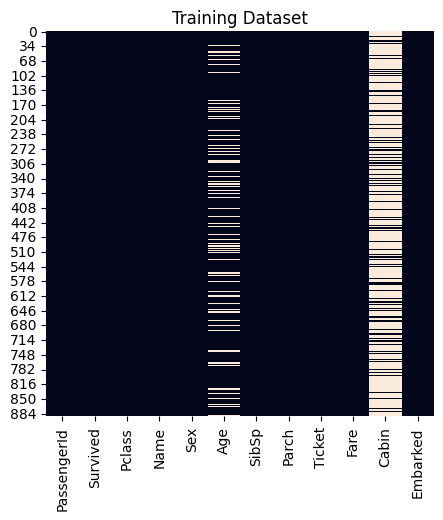

In [ ]:
plot_missing_data(train_df, "Training Dataset")

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 418 entries, 0 to 417

Data columns (total 11 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   PassengerId  418 non-null    int64  

 1   Pclass       418 non-null    int64  

 2   Name         418 non-null    object 

 3   Sex          418 non-null    object 

 4   Age          332 non-null    float64

 5   SibSp        418 non-null    int64  

 6   Parch        418 non-null    int64  

 7   Ticket       418 non-null    object 

 8   Fare         417 non-null    float64

 9   Cabin        91 non-null     object 

 10  Embarked     418 non-null    object 

dtypes: float64(2), int64(4), object(5)

memory usage: 36.0+ KB


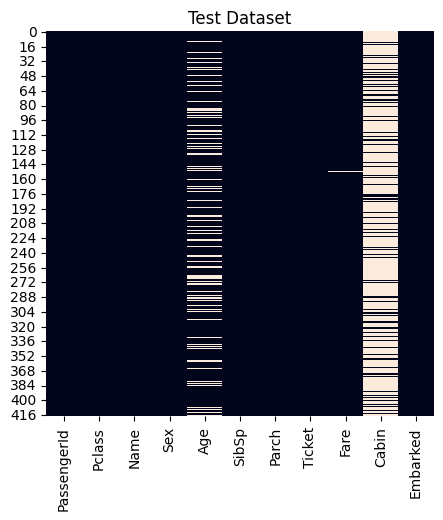

In [ ]:
plot_missing_data(test_df, "Test Dataset")


I have noticed that in the Training Dataset the most missing values are in Cabin and the second biggest amount is regarding age, similarly in Test Dataset there is the same correlation, but you can notice that there a different lines with respect to the y-axis

In [ ]:
def bar_chart_stacked(dataset, feature, stacked = True):
    survived = dataset[dataset['Survived']==1][feature].value_counts()
    dead = dataset[dataset['Survived']==0][feature].value_counts()
    df_survived_dead = pd.DataFrame([survived,dead])
    df_survived_dead.index = ['Passengers Survived','Passengers Died']
    ax = df_survived_dead.plot(kind='bar',stacked=stacked, figsize=(5,5))

Now we should write the code to understand how many people overall survived

In [ ]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
train_df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

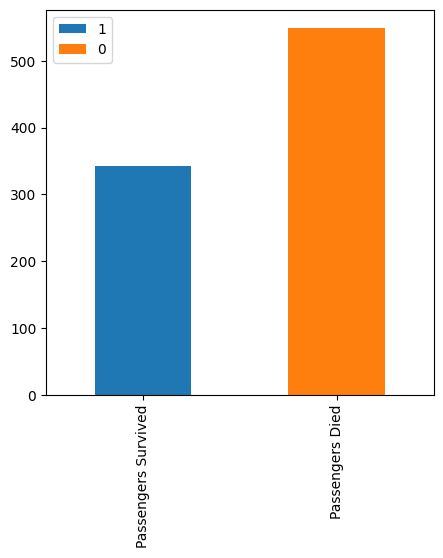

In [ ]:
bar_chart_stacked(train_df, "Survived")

As we can see most passengers in the training set died, about 40% of people survived. This means that there is imballence in the training set, so techniques that rely on sampling won't work well here.

In [ ]:
train_df['Sex'].value_counts().to_frame()

,Sex
male,577
female,314


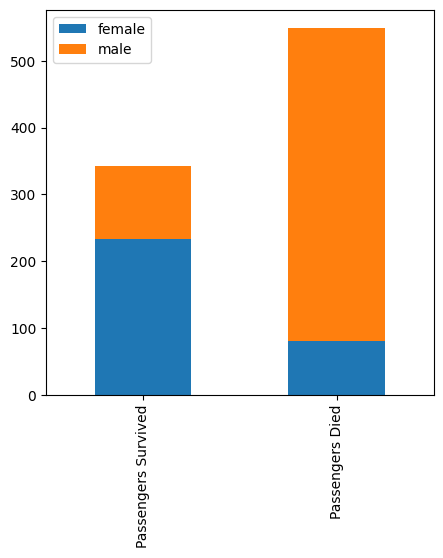

In [ ]:
bar_chart_stacked(train_df, "Sex")

In [ ]:
train_df.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Here we can see that females are 4 times more likely to survive this, unlike males. Males died more, as shown in this dataset.

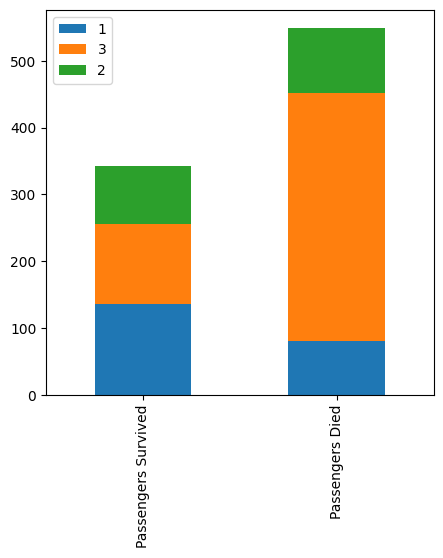

In [ ]:
bar_chart_stacked(train_df, 'Pclass')

In [ ]:
pd.pivot_table(train_df, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [ ]:
train_df.groupby(['Pclass']).Survived.mean().to_frame()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


As we can see Pclass is an important factor in who survives. Most people had class 3 tickets, but only 24% of them survived. From class 1 63% of passangers survived, and from class 2 about 50%. From this we need to determine whether gender or class are the deciding factor of who survives and who doesn't

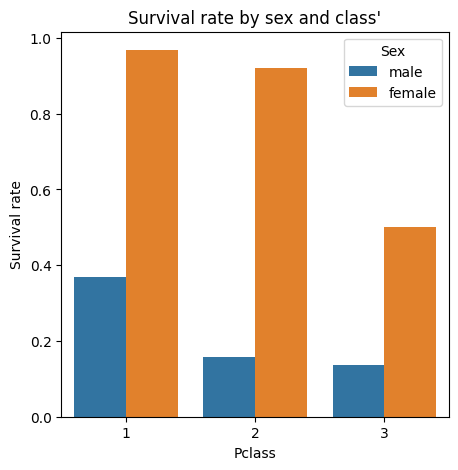

In [ ]:
def bar_chart_compare(dataset, feature1, feature2=None, title = "Survival rate by sex and class'"):
    plt.figure(figsize = [5,5])
    plt.title(title)
    g = sns.barplot(x=feature1, y='Survived', hue=feature2, errorbar=None, data=dataset).set_ylabel('Survival rate')
bar_chart_compare(train_df, "Pclass", "Sex")

In [ ]:
pd.pivot_table(train_df, index = 'Survived', columns = ['Pclass', "Sex"], values = 'Ticket' ,aggfunc ='count')

Pclass        1           2           3     
Sex      female male female male female male
Survived                                    
0             3   77      6   91     72  300
1            91   45     70   17     72   47

In [ ]:
train_df.groupby(['Pclass', "Sex"]).Survived.mean().to_frame()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

Out of the two the most important fact to surviving is gender. However, men from class 1 had a higher chance of surviving. Both features are important bu now we need to compare both genders survivability from the 3 classes. Females class 1 had 96,8% survival rate, class 2 92,1%, class 3 50%. While men from the first class have 36.8% chance of surviving and in the other two classes they still have a lower chances of surviving.

In [ ]:
def plot_distribution(dataset, feature, title, bins = 30, hist = True, fsize = (5,5)):
    fig, ax = plt.subplots(figsize=fsize)
    ax.set_title(title)
    sns.histplot(train_df[feature], color='g', bins=bins, ax=ax)

In [ ]:
def plot_kernel_density_estimate_survivors(dataset, feature1, title, fsize = (5,5)):
    fig, ax = plt.subplots(figsize=fsize)
    ax.set_title(title)
    sns.kdeplot(dataset[feature1].loc[train_df["Survived"] == 1],
                fill= True, ax=ax, label='Survived').set_xlabel(feature1)
    sns.kdeplot(dataset[feature1].loc[train_df["Survived"] == 0],
                fill=True, ax=ax, label="Died")

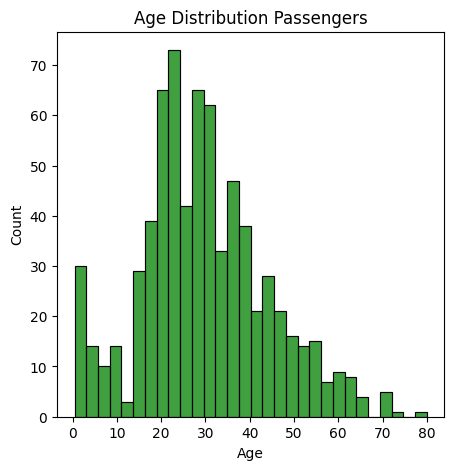

In [ ]:
plot_distribution(train_df, "Age", "Age Distribution Passengers")


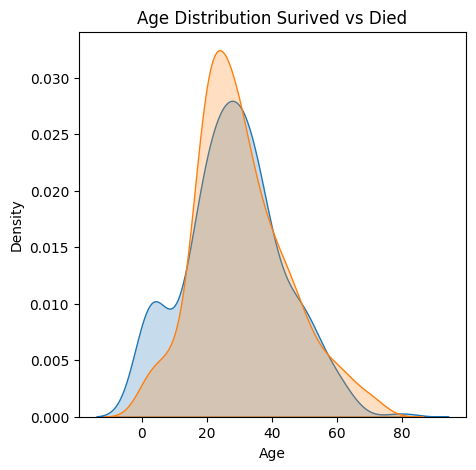

In [ ]:
plot_kernel_density_estimate_survivors(train_df, "Age", "Age Distribution Surived vs Died")


From the diagram above we can see that age has a fairly normal distribution. Here we can also notice that there are more younger survivors, it would be helpful to investigate the correlation between age and gender.

In [ ]:
def plot_swarm_survivors(dataset, feature1, feature2, title, fize = (155)):
    fig, ax = plt.subplots(figsize=(18,5))
    # Turns off grid on the left Axis.
    ax.grid(True)
    plt.xticks(list(range(0,3,1)))
    sns.stripplot(y=feature1, x=feature2, hue='Survived',data=train_df).set_title(title)


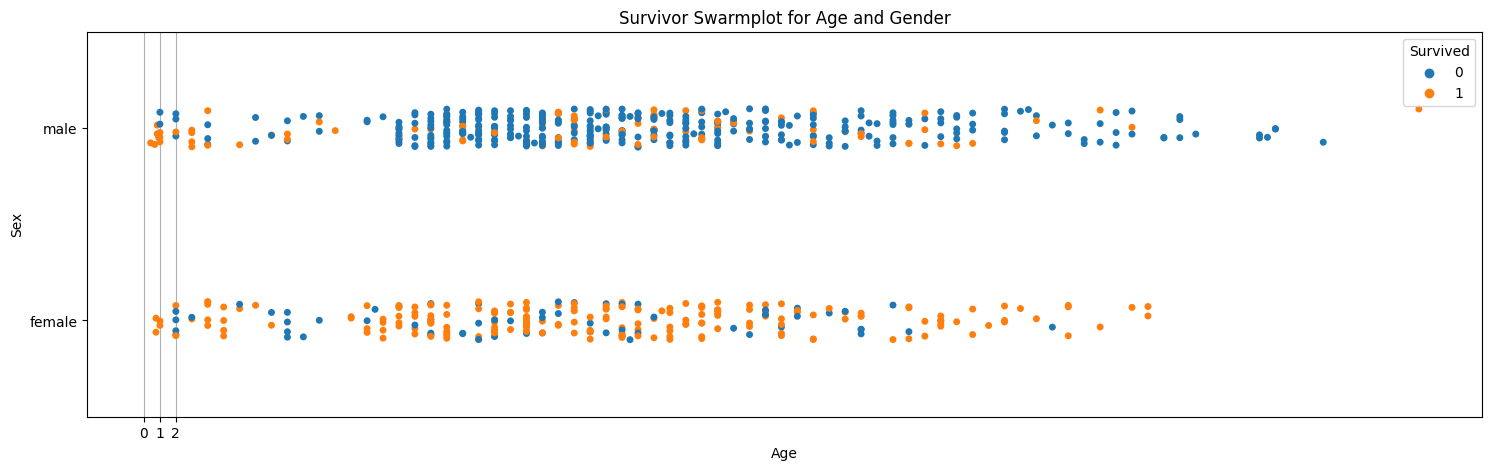

In [ ]:
    plot_swarm_survivors(train_df, "Sex", "Age", "Survivor Swarmplot for Age and Gender")

Age is an important factor, the swarm plot shows that the bigger amount of male survivors are aged from 0 to 12. And the oldest passenger is an 80 year old male.

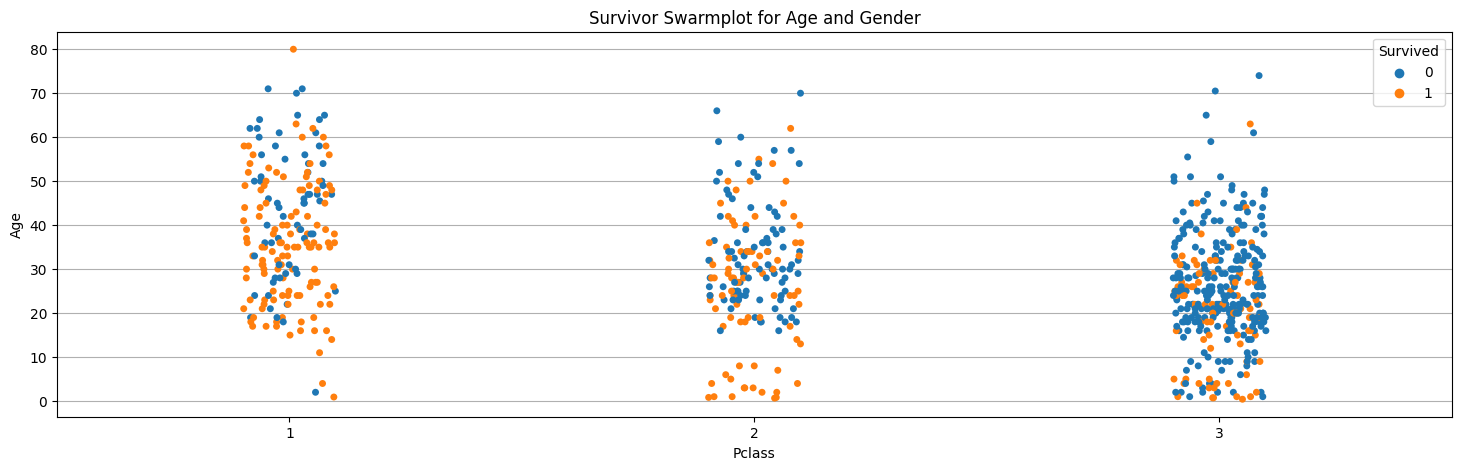

In [ ]:
plot_swarm_survivors(train_df, "Age", "Pclass", "Survivor Swarmplot for Age and Gender")

From this graph we can also see how Pclass has a significance when predicting the likelihood of survival. We can also notice that there weren't many kids in the first class.

In [ ]:
train_df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

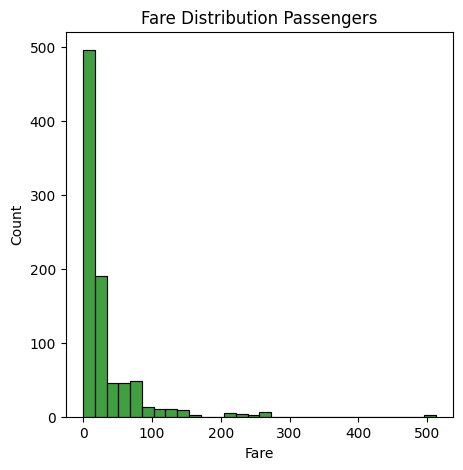

In [ ]:
plot_distribution(train_df, "Fare", "Fare Distribution Passengers")

There isn't a proper distribution at the price range. We can check whether fare affects survival rate, if you're rich do you have a higher chance of living or not. But because there is a skewed range it won't be very effective. We should compare different categories against survivability.

In [ ]:
def plot_quartiles(dataset, feature, title, categories):
    fig, axarr = plt.subplots(figsize=(5,5))
    fare_ranges = pd.qcut(dataset[feature], len(categories), labels = categories) #. [0, .25, .5, .75, 1.]
    axarr.set_title(title)
    sns.barplot(x=fare_ranges, y=dataset.Survived, errorbar=None, ax=axarr).set_ylabel('Survival rate')

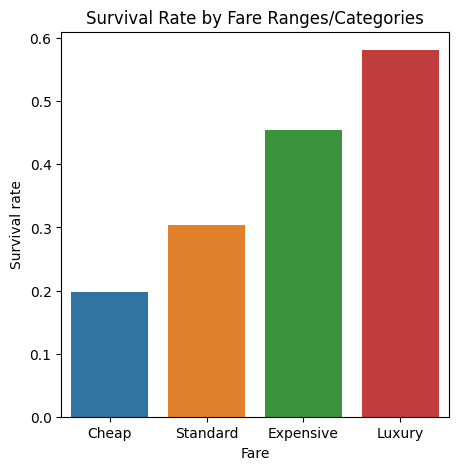

In [ ]:
categories = ['Cheap', 'Standard', 'Expensive', 'Luxury']

plot_quartiles(train_df, "Fare", "Survival Rate by Fare Ranges/Categories", categories)

It's evident that surviving is dependent on how much you paid for the trip. From 0% to 25% of the max price, the survival rate is about 0.2. For 25%-50% about 0.3. For 50%-75% it's approximately 0.45. And lastly for 75%-100% it's 0.55. We also have to check the relation between gender and fare to understand the importance of the feature.

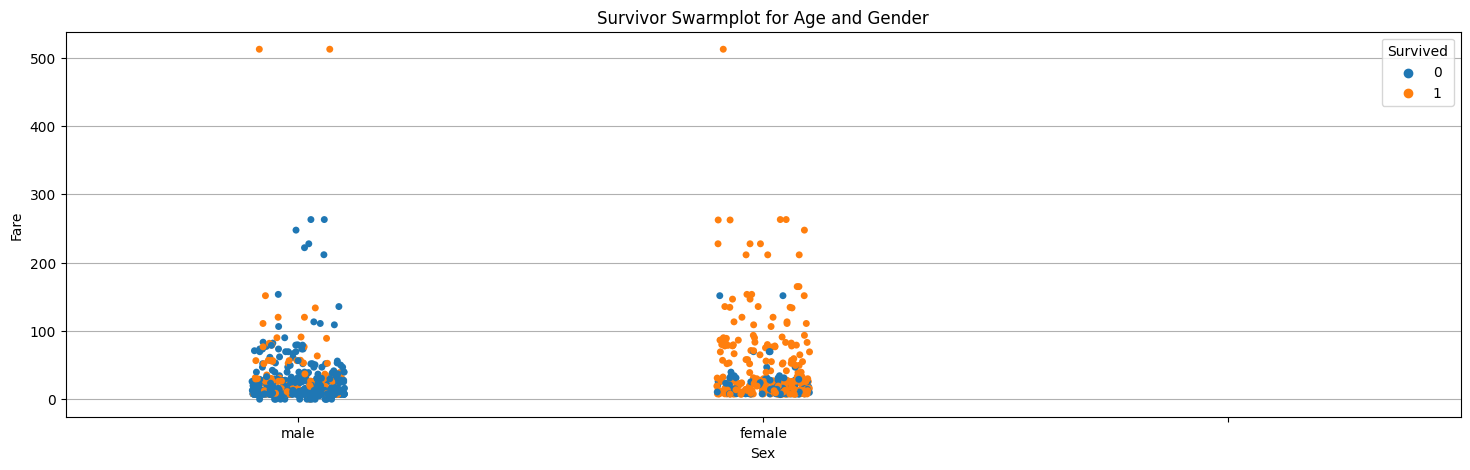

In [ ]:
plot_swarm_survivors(train_df, "Fare", "Sex","Survivor Swarmplot for Age and Gender")

Every gender who paid over 500 for the fare survived. All male and female passengers who paid 200-300 died. What's peculiar, there is a minimum fare which is 0.0. This seems unlikely so it needs to be checked who did that.

In [ ]:
train_df.loc[train_df.Fare==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [ ]:
len(train_df.loc[train_df.Fare==0])

15

15 passengers didn't pay the fair. We can replace those people with nan and impute the values.

In [ ]:
train_df.loc[train_df['Fare'] == 0, 'Fare'] = np.NaN
test_df.loc[train_df['Fare'] == 0, 'Fare'] = np.NaN

In [ ]:
def show_countplot(dataset, feature, title):
    fig, ax = plt.subplots(figsize=(5,5))
    p = sns.countplot(x = feature, data = dataset, ax=ax).set_title(title)

def show_compare_countplot(dataset, feature1, feature2, title):
    fig, ax = plt.subplots(figsize=(5,5))
    p = sns.countplot(x = feature1, hue = feature2, data = dataset, ax=ax).set_title(title)

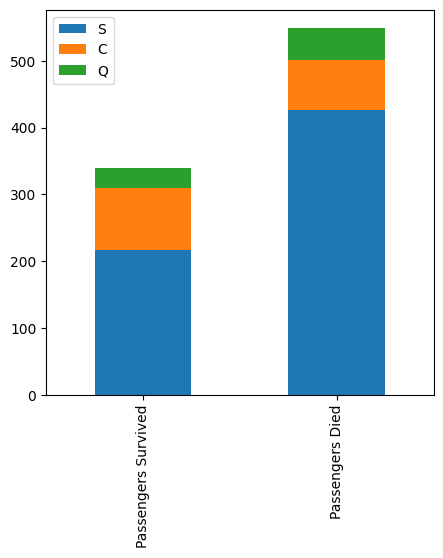

In [ ]:
bar_chart_stacked(train_df, 'Embarked')

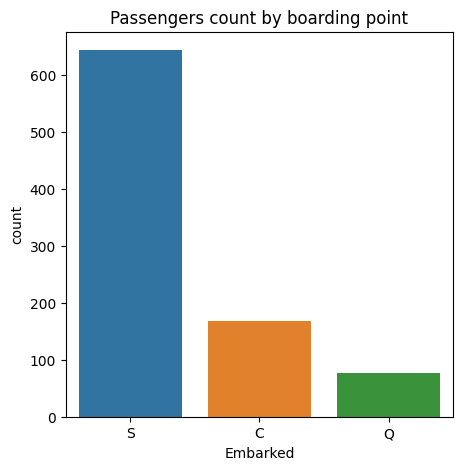

In [ ]:
show_countplot(train_df, "Embarked", 'Passengers count by boarding point')

In [ ]:
train_df['Embarked'].value_counts().to_frame()

,Embarked
S,644
C,168
Q,77


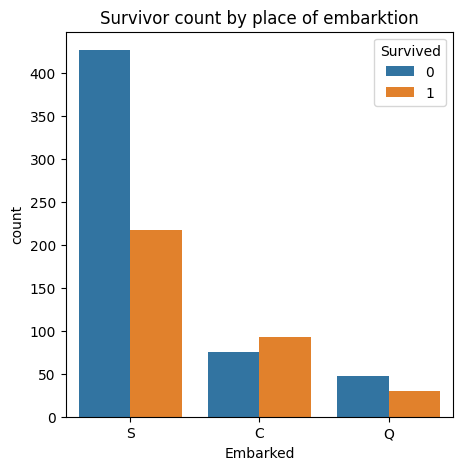

In [ ]:
show_compare_countplot(train_df, "Embarked", "Survived", "Survivor count by place of embarktion")

In [ ]:
pd.pivot_table(train_df, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [ ]:
train_df.groupby(['Embarked']).Survived.mean().to_frame()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


We have 3 possible options for the Embarked Feature which are: Southampton, Cherbourg, and Queenstown. Majority of the passengers embarked from Southampton, but only 33% of them survived. The highest survival rate was amongst the passengers who embarked from Cherbourg with 55%. From this we can expect that the place of embarkment has an effect on the likelihood of survival.

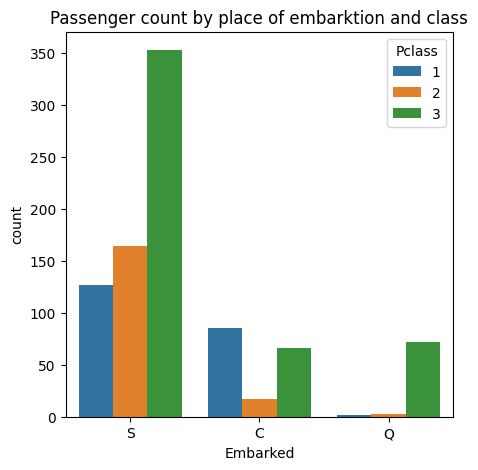

In [ ]:
show_compare_countplot(train_df, "Embarked", "Pclass", "Passenger count by place of embarktion and class")

In [ ]:
train_df.groupby(['Embarked', 'Pclass']).Survived.sum().to_frame()

Survived
Embarked Pclass          
C        1             59
         2              9
         3             25
Q        1              1
         2              2
         3             27
S        1             74
         2             76
         3             67

Most of the passengers that embarked from Cherbourg were class 1, while majority of the passengers from class 3 were from Southampton. But this doesn't explain the survival rate of coming from Queenstown, who have a higher survival rate than Southampton. One of the reasons might be the ratio of male to female passengers

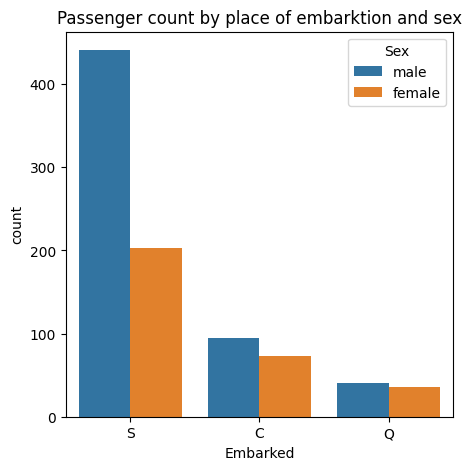

In [ ]:
show_compare_countplot(train_df, "Embarked", "Sex", "Passenger count by place of embarktion and sex")

Confirming the hypothesis above, Queenstown has about the same number of male and female passengers, while Southampton has double the male passengers.

In [ ]:
train_df['SibSp'].value_counts().to_frame()

,SibSp
0,608
1,209
2,28
4,18
3,16
8,7
5,5


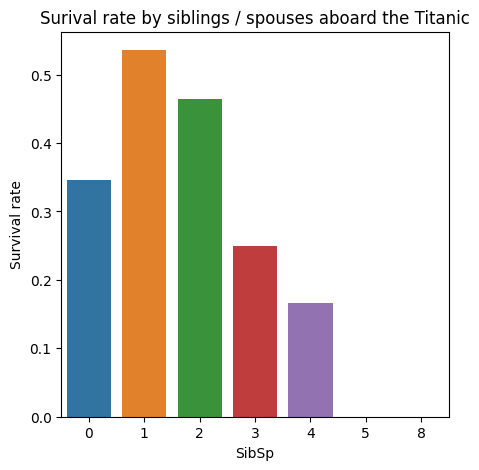

In [ ]:
bar_chart_compare(train_df, "SibSp", title = "Surival rate by siblings / spouses aboard the Titanic")

In [ ]:
train_df.groupby(['SibSp']).Survived.mean().to_frame()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


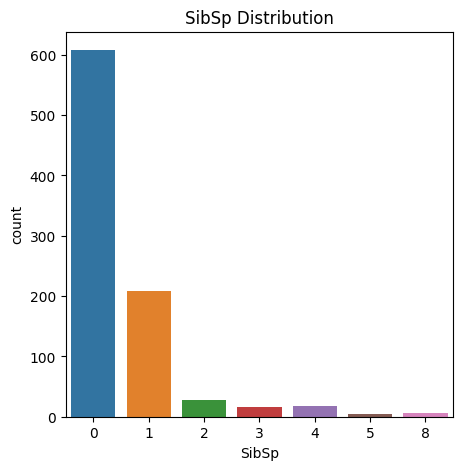

In [ ]:
show_countplot(train_df, "SibSp", 'SibSp Distribution')

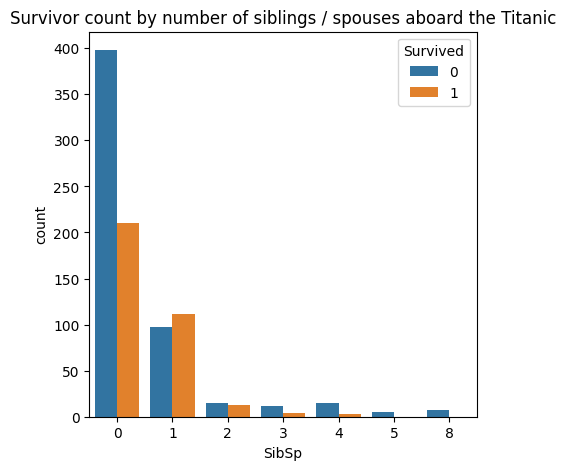

In [ ]:
show_compare_countplot(train_df, "SibSp", "Survived", "Survivor count by number of siblings / spouses aboard the Titanic")

The comparsons above are made to see how many people traveled with siblings or spouses, as we can see most traveled alone. And it seems that the more siblings a passenger had the less chance of survival they had.

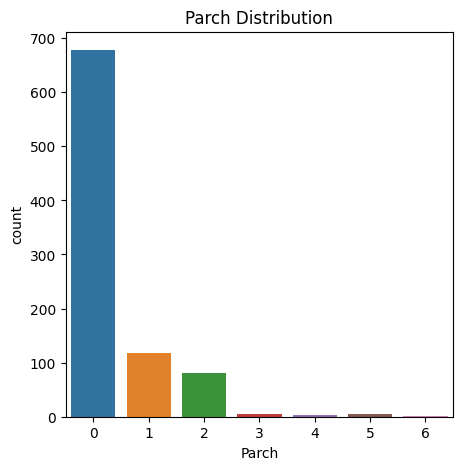

In [ ]:
show_countplot(train_df, "Parch", 'Parch Distribution')

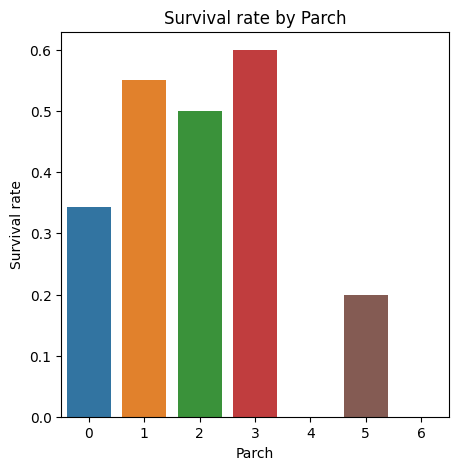

In [ ]:
bar_chart_compare(train_df, "Parch", title = "Survival rate by Parch")

In [ ]:
train_df.groupby(['Parch']).Survived.mean().to_frame()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


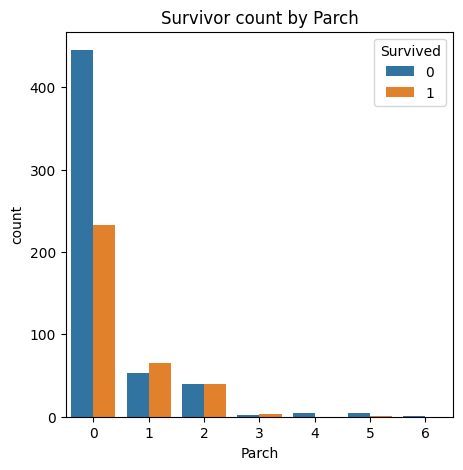

In [ ]:
show_compare_countplot(train_df, "Parch", "Survived", "Survivor count by Parch")

This feature checks for how many parents and children there are. Here we can draw the same conclusion as from SibSp, smaller families had more of a chance of survival rather than bigger ones and passengers who traveled alone. These features might not seem very important but if combined, might give the level trees a chance to pick up something.

In [ ]:
pd.unique(train_df['Name'])

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [ ]:
train_df['Title'] = train_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_df['Title'] = test_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [ ]:
train_df['Title'].value_counts().to_frame()

,Title
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2
the Countess,1


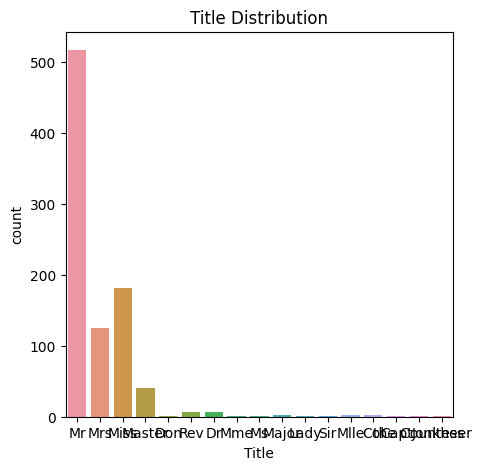

In [ ]:
show_countplot(train_df, "Title", 'Title Distribution')

There is a big irregularity in the titles so we can just convert the male into Mr and female into Ms

In [ ]:
train_df['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Ms', inplace=True)
test_df['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Ms', inplace=True)
train_df['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)
test_df['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)

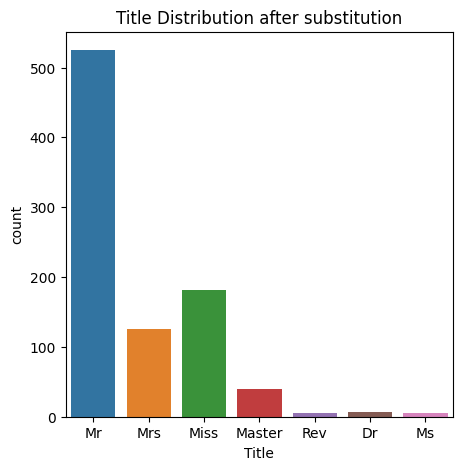

In [ ]:
show_countplot(train_df, "Title", 'Title Distribution after substitution')

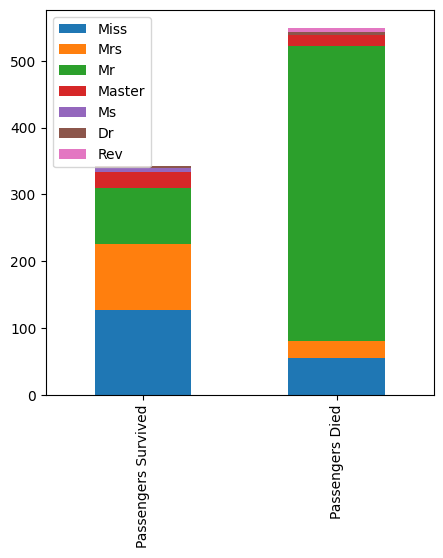

In [ ]:
bar_chart_stacked(train_df, 'Title')

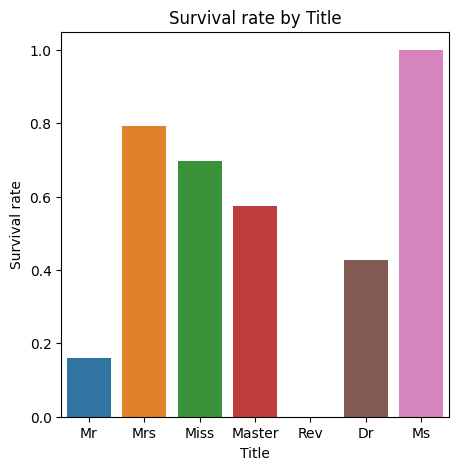

In [ ]:
bar_chart_compare(train_df, "Title", title = "Survival rate by Title")

As previously thought the female titles have a higher survival rate, but so do MAster and Dr. On the other hand Mr survival rate comes to 15%, and all 6 Revernands died.

In [ ]:
train_df[['Cabin', 'Ticket']]

,Cabin,Ticket
0,NaN,A/5 21171
1,C85,PC 17599
2,NaN,STON/O2. 3101282
3,C123,113803
4,NaN,373450
...,...,...
886,NaN,211536
887,B42,112053
888,NaN,W./C. 6607
889,C148,111369


From here we can note that dealing with cabins is pretty pointless becaouse there are a lot of Nans and tickets seem to not provide any useless information either. We can extract the first two letters to create a new feature, then number of letters, number of cabins used, and cabin letter.

In [ ]:
# Extract Leading Letter:
train_df['Ticket_2letter'] = train_df.Ticket.apply(lambda x: x[:2])
test_df['Ticket_2letter'] = test_df.Ticket.apply(lambda x: x[:2])

In [ ]:
# Extract Ticket Lenght:
train_df['Ticket_len'] = train_df.Ticket.apply(lambda x: len(x))
test_df['Ticket_len'] = test_df.Ticket.apply(lambda x: len(x))

In [ ]:
# Extract Number of Cabins:
train_df['Cabin_num'] = train_df.Ticket.apply(lambda x: len(x.split()))
test_df['Cabin_num'] = test_df.Ticket.apply(lambda x: len(x.split()))

In [ ]:
# Extract Leading Letter:
train_df['Cabin_1letter'] = train_df.Ticket.apply(lambda x: x[:1])
test_df['Cabin_1letter'] = test_df.Ticket.apply(lambda x: x[:1])

In [ ]:
len(train_df['Ticket'].value_counts().to_frame())

681

In [ ]:
len(train_df["Ticket_2letter"].value_counts().to_frame())

56

In [ ]:
len(train_df["Ticket_len"].value_counts().to_frame())

15

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticket_2letter,Ticket_len,Cabin_num,Cabin_1letter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,A/,9,2,A
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,PC,8,2,P
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,ST,16,2,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,11,6,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,37,6,1,3


And noe to investigate the results

In [ ]:
len(train_df['Cabin'].value_counts().to_frame())

147

In [ ]:
len(train_df['Cabin_num'].value_counts().to_frame())

3

In [ ]:
train_df['Cabin_num'].value_counts().to_frame()

,Cabin_num
1,665
2,213
3,13


In [ ]:
len(train_df['Cabin_1letter'].value_counts().to_frame())

16

higher abstraction trees might pick up on certain groups if we combine two features to find the family size.

In [ ]:
train_df['Fam_size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Fam_size'] = test_df['SibSp'] + test_df['Parch'] + 1

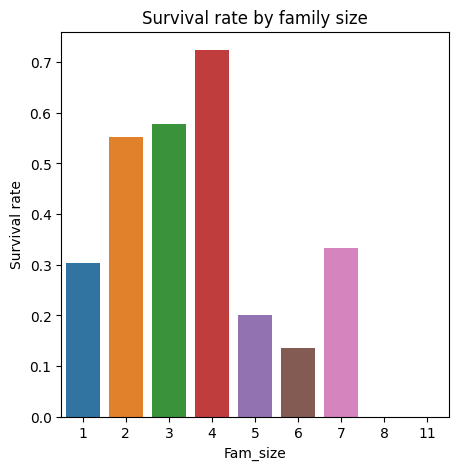

In [ ]:
bar_chart_compare(train_df, "Fam_size", title = "Survival rate by family size")

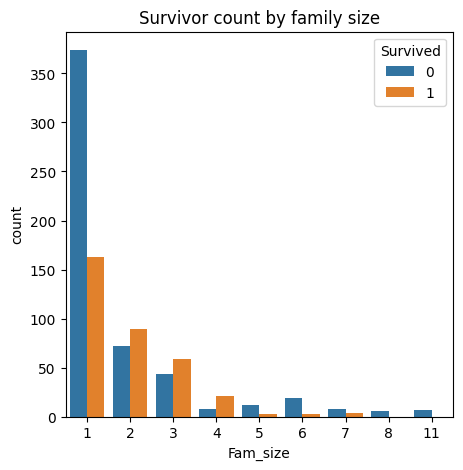

In [ ]:
show_compare_countplot(train_df, "Fam_size", "Survived", "Survivor count by family size")

In [ ]:
# Creation of four groups
train_df['Fam_type'] = pd.cut(train_df.Fam_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])
test_df['Fam_type'] = pd.cut(test_df.Fam_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])

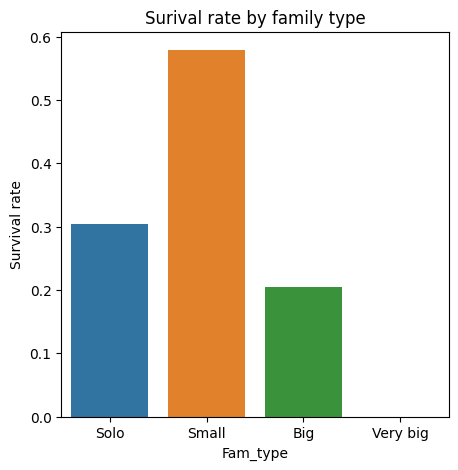

In [ ]:
bar_chart_compare(train_df, "Fam_type", title = "Surival rate by family type")

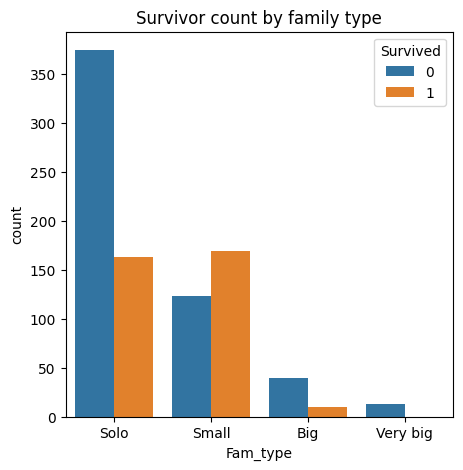

In [ ]:
show_compare_countplot(train_df, "Fam_type", "Survived", "Survivor count by family type")

To train a classifier we need to: start selecting the features that we will use and isolating targets, not considering Cabin and exclude age (young man title is incoded in the Master title), and do not use gender as it is not useful given the title column because we don't want to confuse the algorithm.

In [ ]:
y = train_df['Survived']
features = ['Pclass', 'Fare', 'Title', 'Embarked', 'Fam_type', 'Ticket_len', 'Ticket_2letter']
X = train_df[features]
X.head()

,Pclass,Fare,Title,Embarked,Fam_type,Ticket_len,Ticket_2letter
0,3,7.2500,Mr,S,Small,9,A/
1,1,71.2833,Mrs,C,Small,8,PC
2,3,7.9250,Miss,S,Solo,16,ST
3,1,53.1000,Mrs,S,Small,6,11
4,3,8.0500,Mr,S,Solo,6,37


In [ ]:
numerical_cols = ['Fare']
categorical_cols = ['Pclass', 'Title', 'Embarked', 'Fam_type', 'Ticket_len', 'Ticket_2letter']

# Inputing numerical values with median
numerical_transformer = SimpleImputer(strategy='median')

# Inputing missing values with most frequent one for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Bundle preprocessing and modeling code
titanic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=0, n_estimators=500, max_depth=5))
])

# Training
titanic_pipeline.fit(X,y)
print('Cross validation score: {:.3f}'.format(cross_val_score(titanic_pipeline, X, y, cv=10).mean()))

Cross validation score: 0.825


In [ ]:
X_test = test_df[features]
X_test.head()

,Pclass,Fare,Title,Embarked,Fam_type,Ticket_len,Ticket_2letter
0,3,7.8292,Mr,Q,Solo,6,33
1,3,7.0000,Mrs,S,Small,6,36
2,2,9.6875,Mr,Q,Solo,6,24
3,3,8.6625,Mr,S,Solo,6,31
4,3,12.2875,Mrs,S,Small,7,31


In [ ]:
predictions = titanic_pipeline.predict(X_test)

In [ ]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print('Your submission was successfully saved!')

Your submission was successfully saved!
